In [6]:
import fastai
from fastai.vision.all import *

import torch
from matplotlib import patches, patheffects
from torch import nn
from torch import optim
from torch.nn import functional as F
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import torch
torch.cuda.is_available()

In [10]:
alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
atoi = {l: c for c, l in enumerate(alphabet)}
itoa = {c: l for c, l in enumerate(alphabet)}

In [11]:
path = "asl_alphabet_train/asl_alphabet_train/"
files = []
for a in atoi:
    files += get_image_files(path + a)

print(len(files))

78000


In [12]:
def label_func(f):
    return f[0]

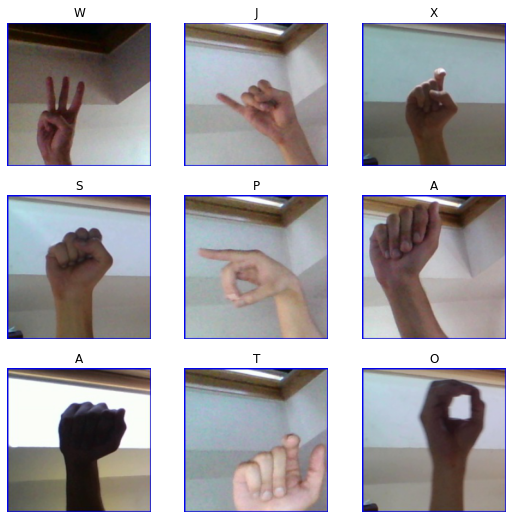

In [13]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(100))
dls.show_batch()

In [14]:
import ssl

# Not sure why I couldnt get this to work with ssl, but it kept failing
ssl._create_default_https_context = ssl._create_unverified_context

KeyboardInterrupt: 

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [ ]:
learn.predict(files[0])

In [ ]:
learn.show_results()

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-2)

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))